# Math 189 Project Notebook - Investigating Flight Delays

## Setup and Data Cleaning

In [26]:
pip install gdown

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import seaborn as sns




In [29]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [30]:
# reading in the csv file from Google Drive

import gdown

file_id = "1yQDnF1A54d2CYv_CqceyFLzBCw6FFGb4"
url = f"https://drive.google.com/uc?id={file_id}"

filename = "flight_data.csv"
gdown.download(url, filename, quiet=False)

airline_data = pd.read_csv(filename, low_memory = False)

Downloading...
From (original): https://drive.google.com/uc?id=1yQDnF1A54d2CYv_CqceyFLzBCw6FFGb4
From (redirected): https://drive.google.com/uc?id=1yQDnF1A54d2CYv_CqceyFLzBCw6FFGb4&confirm=t&uuid=33aca102-ce0b-4d5c-9955-b20679eb2d5f
To: c:\Users\seanh\Desktop\Math 189\Math189Project\flight_data.csv
100%|██████████| 714M/714M [00:16<00:00, 43.3MB/s] 


In [31]:
# filtering the data to get all observations after the year 2000 and sorting by year

df = airline_data[airline_data['Year'] >= 2000].sort_values(by = 'Year').reset_index().drop(columns = ['index'])

In [32]:
# selecting only relevant and useful columns from data

df = df[[
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'Origin',
 'OriginStateName',
 'Dest',
 'DestStateName',
 'DepTime',
 'DepDelay',
 'DepartureDelayGroups',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'ArrTime',
 'ArrDelay',
 'ArrivalDelayGroups',
 'Cancelled',
 'Diverted',
 'ActualElapsedTime',
 'AirTime',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']]

In [33]:
# this will be the data frame we are working with

df.head()

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,5,2000-07-14,US,PIT,Pennsylvania,TOL,Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2000-05-10,DL,JFK,New York,ATL,Georgia,2010.0,160.0,10.0,101.0,2151.0,2334.0,8.0,2342.0,222.0,12.0,0.0,0.0,212.0,103.0,NaN,NaN,NaN,NaN,NaN
2,2,2000-05-30,HP,LAS,Nevada,LAX,California,1948.0,2.0,0.0,20.0,2008.0,2052.0,12.0,2104.0,9.0,0.0,0.0,0.0,76.0,44.0,NaN,NaN,NaN,NaN,NaN
3,5,2000-03-03,DL,LAS,Nevada,LAX,California,602.0,2.0,0.0,11.0,613.0,658.0,11.0,709.0,7.0,0.0,0.0,0.0,67.0,45.0,NaN,NaN,NaN,NaN,NaN
4,1,2000-08-07,WN,HOU,Texas,MSY,Louisiana,853.0,8.0,0.0,5.0,858.0,950.0,5.0,955.0,10.0,0.0,0.0,0.0,62.0,52.0,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

## ADD REMAINING EDA AND PLOTS IN THIS SECTION

In [34]:
# examine the number of null values and determine relevant columns 

((df.isnull().sum() / df.shape[0]) * 100).to_dict()

{'DayOfWeek': 0.0,
 'FlightDate': 0.0,
 'Reporting_Airline': 0.0,
 'Origin': 0.0,
 'OriginStateName': 0.0,
 'Dest': 0.0,
 'DestStateName': 0.0,
 'DepTime': 1.8829583050163925,
 'DepDelay': 1.8876632736125942,
 'DepartureDelayGroups': 1.8876632736125942,
 'TaxiOut': 1.909171701480945,
 'WheelsOff': 1.9106653423051358,
 'WheelsOn': 2.0349362588778277,
 'TaxiIn': 2.029708515993159,
 'ArrTime': 2.029708515993159,
 'ArrDelay': 2.143747992920143,
 'ArrivalDelayGroups': 2.143747992920143,
 'Cancelled': 0.0,
 'Diverted': 0.0,
 'ActualElapsedTime': 2.1418062598486944,
 'AirTime': 2.141880941889904,
 'CarrierDelay': 83.4352992135981,
 'WeatherDelay': 83.4352992135981,
 'NASDelay': 83.4352992135981,
 'SecurityDelay': 83.4352992135981,
 'LateAircraftDelay': 83.4352992135981}

Flight Date

<Axes: >

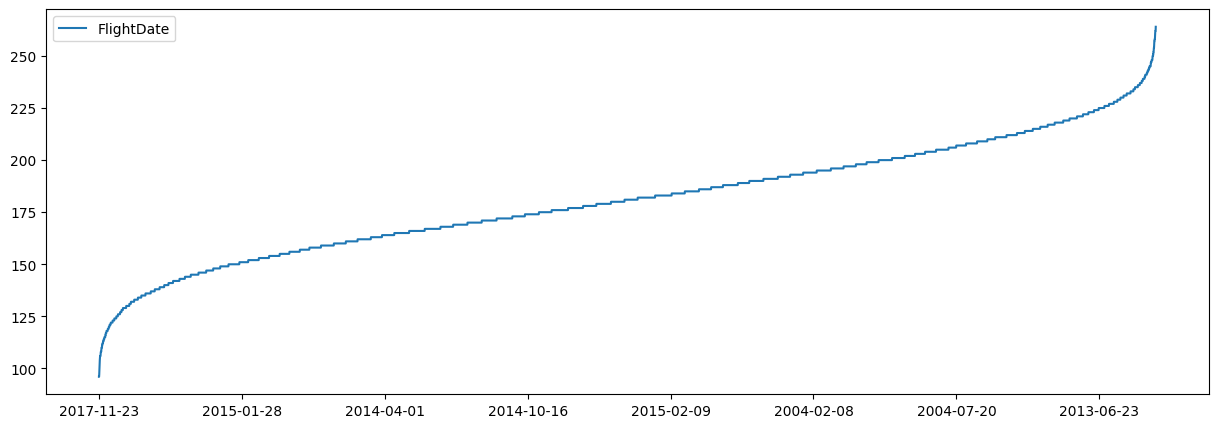

In [35]:
df["FlightDate"].value_counts().to_frame().sort_values(by="FlightDate").plot(figsize=(15, 5))

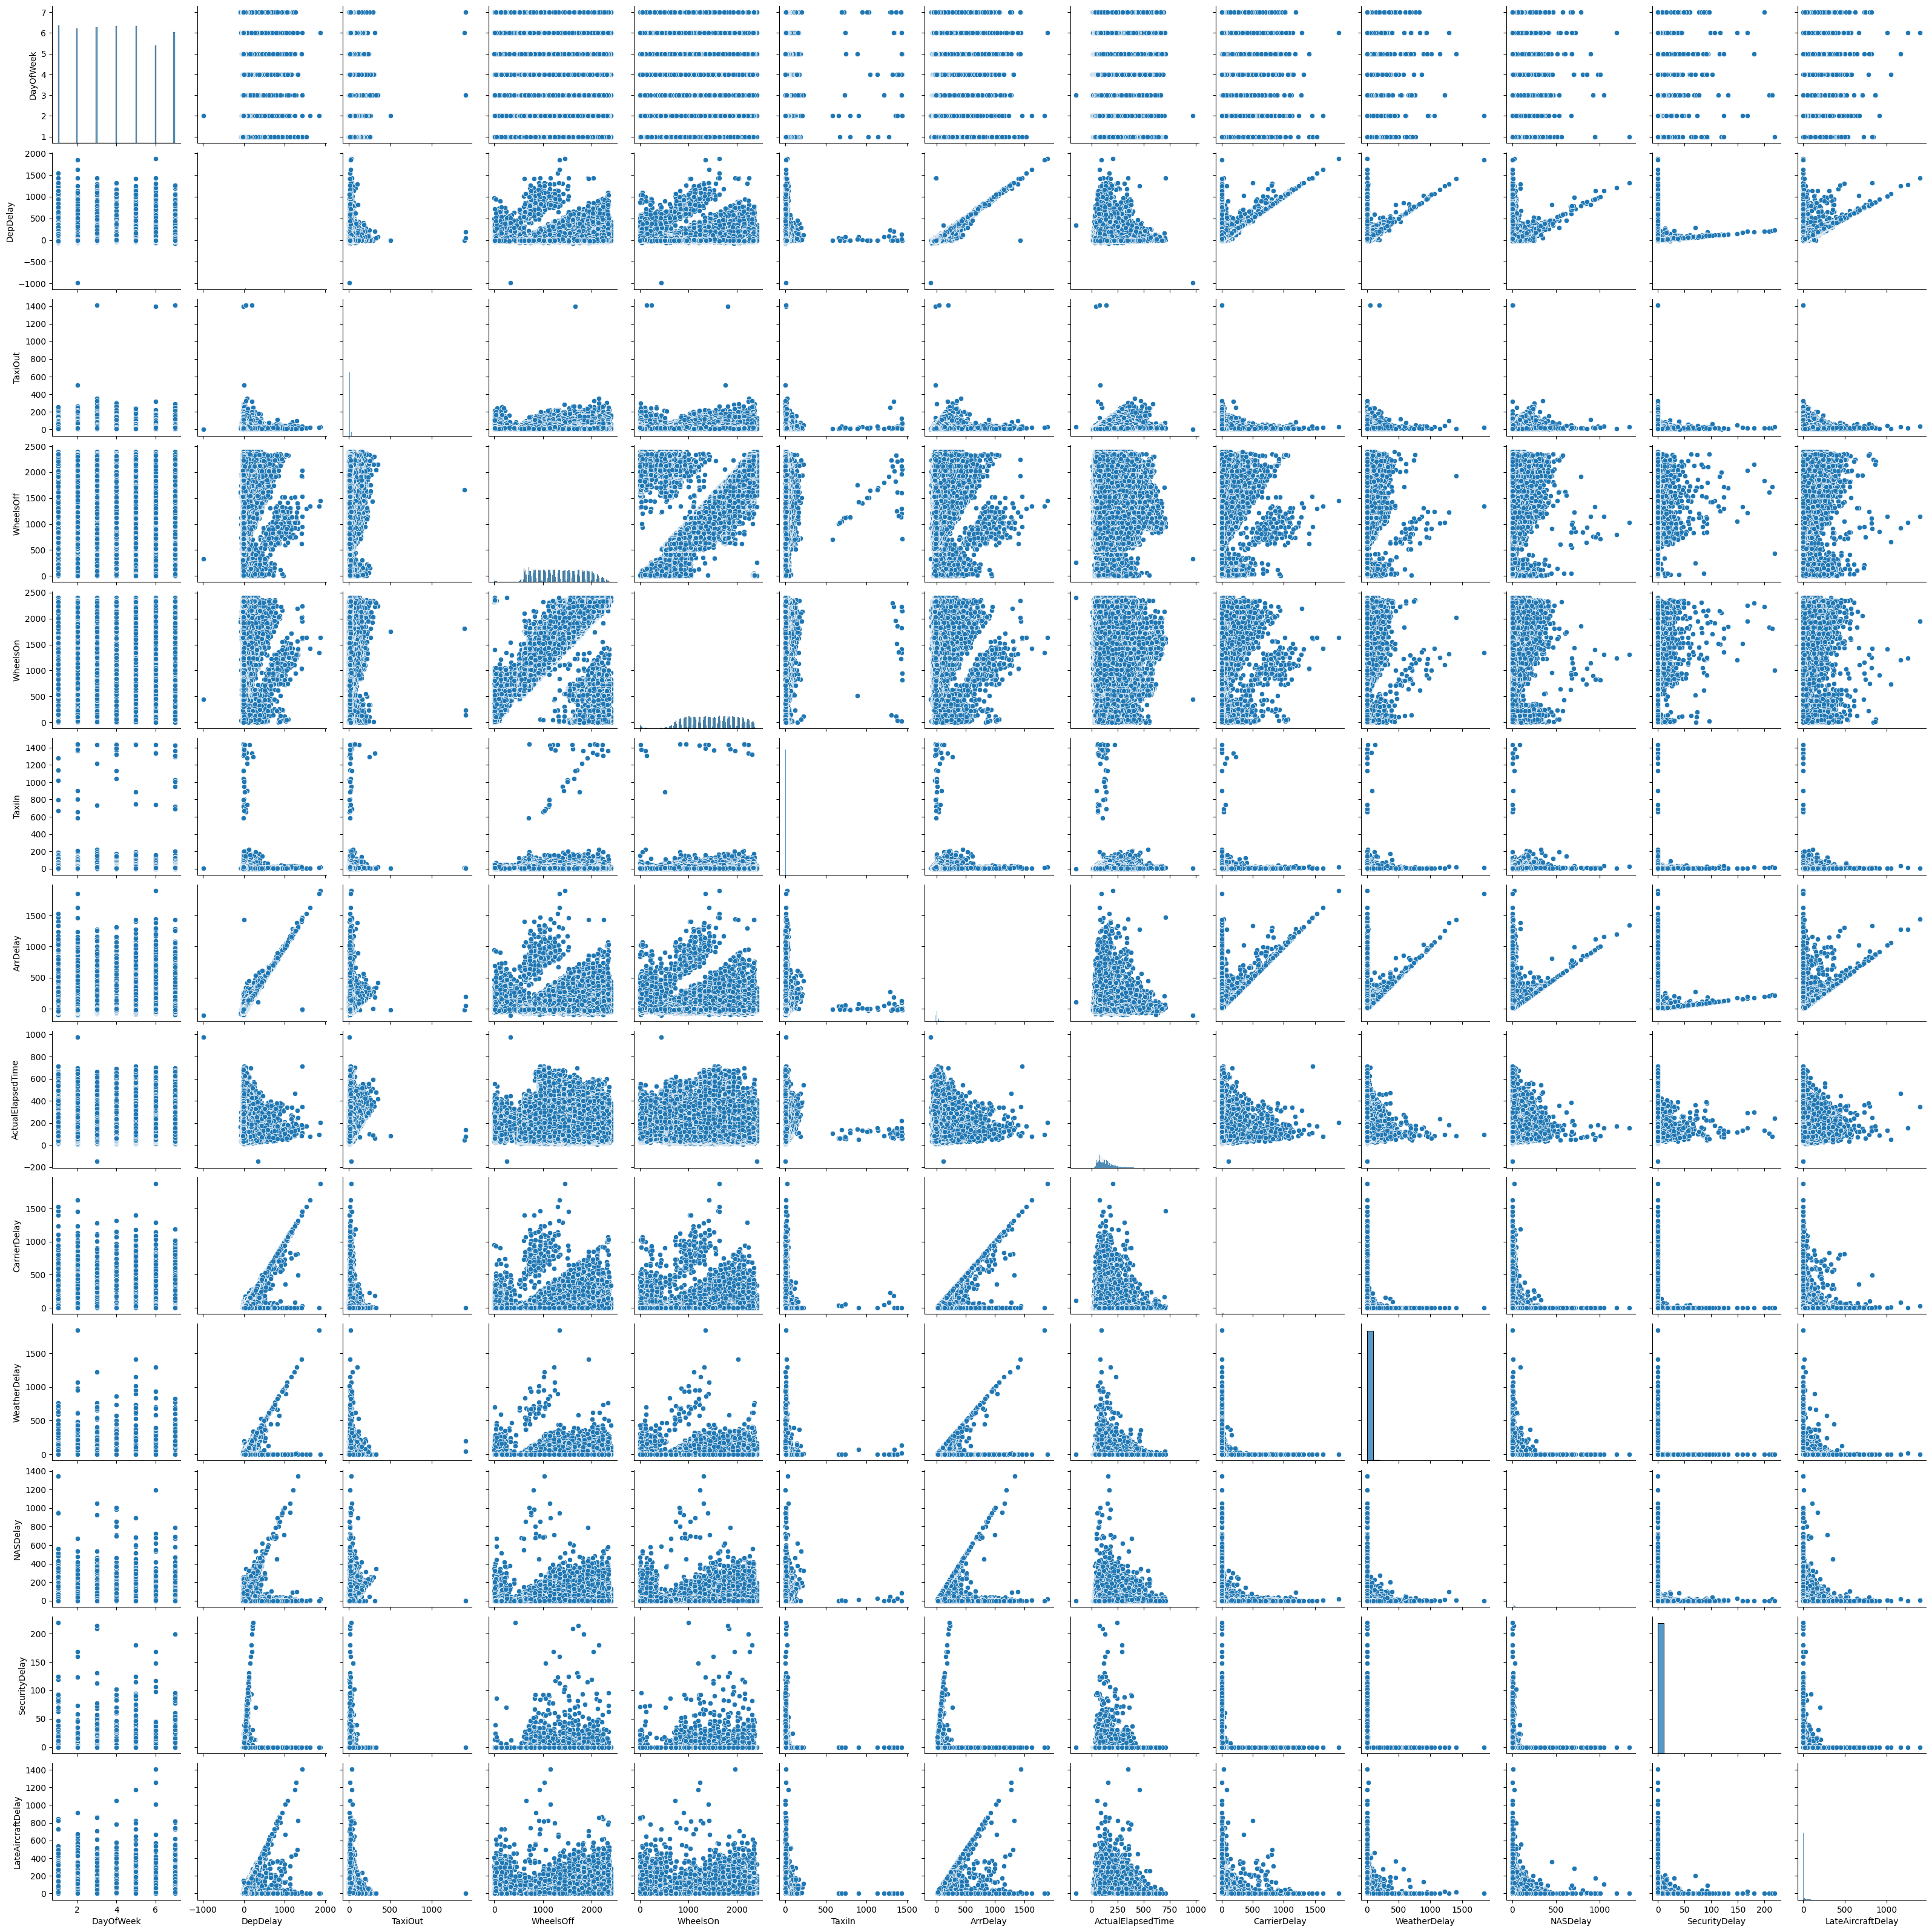

In [36]:
sns.pairplot(df[[
 'DayOfWeek',
 'Reporting_Airline',
 'Origin',
 'Dest',
 'DepDelay',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'ArrDelay',
 'ActualElapsedTime',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']])

#13 minute runtime
#If unable to run, please see pairwise.png

<Axes: title={'center': 'FlightDate vs DepDelay'}, xlabel='FlightDate'>

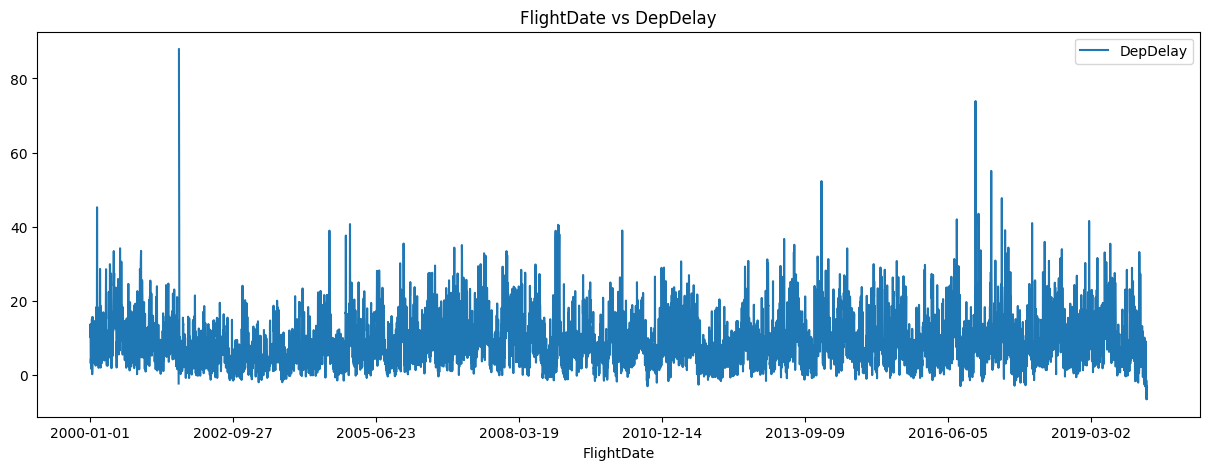

In [37]:
temp_df = df[["FlightDate", "DepDelay"]].groupby("FlightDate")["DepDelay"].mean().to_frame()

temp_df.sort_values(by="FlightDate").plot(title="FlightDate vs DepDelay", figsize=(15, 5))

In [38]:
# https://gist.github.com/AndreiCalazans/390e82a1c3edff852137cb3da813eceb

airline_code_dictory = {
  "U2": "easyjet",
  "1T": "Bulgarian Air Charter",
  "Q5": "40-Mile Air",
  "4O": "Interjet",
  "7A": "Express Air Cargo",
  "JY": "Air Turks and Caicos",
  "JU": "Air Serbia",
  "QH": "Kyrgyzstan",
  "A8": "Benin Golf Air",
  "RV": "Caspian Airlines",
  "1B": "Abacus International",
  "W9": "Eastwind Airlines",
  "6U": "Air Ukraine",
  "E4": "Aero Asia International",
  "ZI": "Aigle Azur",
  "AE": "Mandarin Airlines",
  "OZ": "Ozark Air Lines",
  "8U": "Afriqiyah Airways",
  "Q9": "Afrinat International Airlines",
  "KI": "Adam Air",
  "QB": "Georgian National Airlines",
  "LD": "Air Hong Kong",
  "UX": "Air Europa",
  "NX": "Air Macau",
  "ZV": "Air Midwest",
  "HM": "Air Seychelles",
  "AF": "Air France",
  "SB": "Air Caledonie International",
  "EH": "SAETA",
  "ZW": "Air Wisconsin",
  "GN": "Air Gabon",
  "NQ": "Air Japan",
  "VD": "SwedJet Airways",
  "TT": "Tigerair Australia",
  "4N": "Air North Charter - Canada",
  "NZ": "Eagle Airways",
  "QM": "Air Malawi",
  "ML": "Midway Airlines (1976–1991)",
  "P8": "Pantanal Linhas Aéreas",
  "BM": "BMI Regional",
  "ZX": "Air Georgian",
  "G8": "Gujarat Airways",
  "7T": "Tobruk Air",
  "6V": "Mars RK",
  "NH": "All Nippon Airways",
  "TZ": "ATA Airlines",
  "2Q": "Air Cargo Carriers",
  "V7": "Volotea",
  "AB": "Air Berlin",
  "4D": "Air Sinai",
  "QN": "Air Armenia",
  "AI": "Air India Limited",
  "PJ": "Air Saint Pierre",
  "SZ": "Air Southwest",
  "8C": "Shanxi Airlines",
  "NF": "Air Vanuatu",
  "ZB": "Monarch Airlines",
  "CC": "Macair Airlines",
  "RB": "Syrian Arab Airlines",
  "TN": "Air Tahiti Nui",
  "SW": "Air Namibia",
  "AW": "Dirgantara Air Service",
  "PE": "People's Viennaline",
  "JM": "Jetstar Hong Kong Airways",
  "6G": "Air Wales",
  "TX": "Transportes Aéreos Nacionales",
  "IX": "Air India Express",
  "BT": "Air Baltic",
  "EL": "Ellinair",
  "YW": "Air Nostrum",
  "PX": "Air Niugini",
  "G9": "Air Arabia",
  "AC": "Air Canada",
  "AP": "Air One",
  "XT": "SkyStar Airways",
  "UM": "Air Zimbabwe",
  "S2": "Air Sahara",
  "TC": "Air Tanzania",
  "2J": "Air Burkina",
  "KM": "Air Malta",
  "YT": "Air Togo",
  "G4": "Allegiant Air",
  "M3": "North Flying",
  "O4": "Antrak Air",
  "GB": "ABX Air",
  "8V": "Wright Air Service",
  "8T": "Air Tindi",
  "JP": "Adria Airways",
  "A3": "Aegean Airlines",
  "2K": "Aerogal",
  "KD": "KD Avia",
  "KO": "Alaska Central Express",
  "VX": "Virgin America",
  "KH": "Aloha Air Cargo",
  "AA": "American Airlines",
  "AX": "Trans States Airlines",
  "AN": "Ansett Australia",
  "5W": "Astraeus",
  "VV": "Aerosvit Airlines",
  "WK": "Edelweiss Air",
  "QQ": "Reno Air",
  "FG": "Ariana Afghan Airlines",
  "Y2": "Flyglobespan",
  "SU": "Aeroflot Russian Airlines",
  "5Z": "VivaColombia",
  "5D": "DonbassAero",
  "1A": "Amadeus IT Group",
  "JJ": "LATAM Brasil",
  "PL": "Airstars",
  "8A": "Atlas Blue",
  "GD": "Air Alpha Greenland",
  "HT": "Aeromist-Kharkiv",
  "J2": "Azerbaijan Airlines",
  "U3": "Avies",
  "4Y": "Yute Air Alaska",
  "5A": "Alpine Air Express",
  "W4": "Aero Services Executive",
  "IZ": "Arkia Israel Airlines",
  "M6": "Amerijet International",
  "4A": "Air Kiribati",
  "EV": "ExpressJet",
  "HP": "Phoenix Airways",
  "VH": "Aeropostal Alas de Venezuela",
  "AM": "Aeroméxico",
  "TL": "Trans Mediterranean Airlines",
  "OY": "Omni Air International",
  "IW": "Wings Air",
  "J6": "AVCOM",
  "2D": "Aero VIP",
  "VB": "VIVA Aerobus",
  "OE": "Asia Overnight Express",
  "GV": "Aero Flight",
  "JW": "Vanilla Air",
  "2B": "Aerocondor",
  "4C": "Aires, Aerovías de Integración Regional, S.A.",
  "AR": "Aerolíneas Argentinas",
  "AS": "Alaska Airlines, Inc.",
  "OB": "Oasis International Airlines",
  "HC": "Iceland Express",
  "FO": "Airlines of Tasmania",
  "OS": "Austrian Airlines",
  "IQ": "Augsburg Airways",
  "RU": "SkyKing Turks and Caicos Airways",
  "MO": "Calm Air",
  "GR": "Gemini Air Cargo",
  "NO": "Neos",
  "AU": "Austral Líneas Aéreas",
  "AO": "Australian Airlines",
  "AV": "Avianca - Aerovías del Continente Americano S.A.",
  "A0": "Avianca Argentina",
  "O6": "Avianca Brazil",
  "K8": "Airlink Zambia",
  "B9": "Air Bangladesh",
  "HJ": "Hellas Jet",
  "AK": "Air Bridge Carriers",
  "D7": "FlyAsianXpress",
  "DJ": "Polynesian Blue",
  "I5": "AirAsia India",
  "EX": "Air Santo Domingo",
  "3G": "Atlant-Soyuz Airlines",
  "AZ": "Alitalia",
  "ZE": "Líneas Aéreas Azteca",
  "A2": "Cielos Airlines",
  "R7": "Aserca Airlines",
  "RX": "Aviaexpress",
  "MQ": "American Eagle Airlines",
  "ZS": "Sama Airlines",
  "FF": "Airshop",
  "VU": "Air Ivoire",
  "BP": "Air Botswana",
  "GS": "Tianjin Airlines",
  "VT": "Air Tahiti",
  "3N": "Air Urga",
  "VL": "Air VIA",
  "FK": "Keewatin Air",
  "G2": "Avirex",
  "V8": "Iliamna Air Taxi",
  "K6": "Khalifa Airways",
  "VE": "C.A.I. Second",
  "V5": "Royal Aruban Airlines",
  "CA": "Air China",
  "Q6": "Aero Condor Peru",
  "5F": "Fly One",
  "QC": "Air Corridor",
  "NV": "Air Central",
  "CV": "Cargolux",
  "CW": "Air Marshall Islands",
  "ZA": "Interavia Airlines",
  "AH": "Air Algérie",
  "ER": "Astar Air Cargo",
  "HO": "Juneyao Airlines",
  "EN": "Air Dolomiti",
  "NM": "Mount Cook Airlines",
  "EE": "Aero Airlines",
  "4F": "Air City",
  "EI": "Aer Lingus",
  "E8": "Alpi Eagles",
  "KY": "Air São Tomé and Príncipe",
  "PC": "Pegasus Airlines",
  "OF": "Transports et Travaux Aériens de Madagascar",
  "FJ": "Fiji Airways",
  "RC": "Atlantic Airways",
  "NY": "Air Iceland",
  "2P": "Air Philippines",
  "2U": "Air Guinee Express",
  "0A": "Amber Air",
  "DA": "Air Georgia",
  "GL": "Miami Air International",
  "LL": "Allegro",
  "5Y": "Atlas Air",
  "GG": "Cargo 360",
  "H9": "Izair",
  "HD": "AIRDO",
  "IP": "Atyrau Air Ways",
  "QK": "Air Canada Jazz",
  "KK": "Atlasjet",
  "JS": "Air Koryo",
  "KC": "Air Astana",
  "LV": "Albanian Airlines",
  "3S": "Air Guyane Express",
  "D4": "Alidaunia",
  "9I": "Thai Sky Airlines",
  "XL": "Aerolane",
  "A6": "Hongtu Airlines",
  "TD": "Tulip Air",
  "L8": "Air Luxor GB",
  "LK": "Air Luxor",
  "MK": "Air Mauritius",
  "MD": "Air Madagascar",
  "9U": "Air Moldova",
  "L9": "Teamline Air",
  "A7": "Air Plus Comet",
  "QO": "Origin Pacific Airways",
  "MR": "Air Mauritanie",
  "F4": "Albarka Air",
  "AJ": "Aero Contractors",
  "8Y": "China Postal Airlines",
  "OT": "Aeropelican Air Services",
  "AD": "Azul Linhas Aéreas Brasileiras",
  "QD": "Air Class Líneas Aéreas",
  "QS": "Travel Service",
  "AG": "",
  "MC": "Air Mobility Command",
  "RE": "Stobart Air",
  "UU": "Air Austral",
  "ZP": "Silk Way Airlines",
  "6K": "Asian Spirit",
  "A5": "Hop!",
  "QL": "Línea Aérea de Servicio Ejecutivo Regional",
  "R3": "Yakutia Airlines",
  "MV": "Armenian International Airways",
  "2O": "Air Salone",
  "U8": "Armavia",
  "BQ": "Baltia Air Lines",
  "P5": "AeroRepública",
  "BF": "Bluebird Cargo",
  "5L": "AeroSur",
  "JR": "Aero California",
  "Z3": "Avient Aviation",
  "GM": "Air Slovakia",
  "VW": "Aeromar",
  "OR": "TUI Airlines Netherlands",
  "CG": "Airlines PNG",
  "TY": "Iberworld",
  "FL": "AirTran Airways",
  "TS": "Air Transat",
  "EC": "Avialeasing Aviation Company",
  "DW": "Aero-Charter Ukraine",
  "U7": "USA Jet Airlines",
  "6R": "Alrosa Air Company",
  "6A": "Aviacsa",
  "JZ": "Skyways Express",
  "AQ": "MAP-Management and Planung",
  "3J": "Zip",
  "SM": "Swedline Express",
  "KJ": "British Mediterranean Airways",
  "BX": "Coast Air",
  "YE": "Aryan Cargo Express",
  "VJ": "Vietjet Air",
  "3O": "Air Arabia Maroc",
  "X9": "Avion Express",
  "JD": "Beijing Capital Airlines",
  "ID": "Interlink Airlines",
  "BA": "British Airways",
  "BG": "Biman Bangladesh Airlines",
  "B4": "Bankair",
  "WX": "CityJet",
  "BZ": "Keystone Air Service",
  "JA": "JetSMART",
  "J4": "Jordan International Air Cargo",
  "8H": "BH Air",
  "4T": "Belair Airlines",
  "UP": "Bahamasair",
  "E6": "Bringer Air Cargo Taxi Aéreo",
  "LZ": "Balkan Bulgarian Airlines",
  "TH": "Transmile Air Services",
  "BS": "British International Helicopters",
  "PG": "Bangkok Airways",
  "KF": "Blue1",
  "JV": "Bearskin Lake Air Service",
  "B3": "Bellview Airlines",
  "BD": "BMI",
  "WW": "WOW air",
  "CH": "Bemidji Airlines",
  "BO": "Bouraq Indonesia Airlines",
  "BV": "Blue Panorama Airlines",
  "7R": "BRA-Transportes Aéreos",
  "8E": "Bering Air",
  "B2": "Belavia Belarusian Airlines",
  "BN": "Horizon Airlines",
  "GQ": "Big Sky Airlines",
  "V9": "Star1 Airlines",
  "Y6": "Batavia Air",
  "BU": "Buryat Airlines Aircompany",
  "J8": "Berjaya Air",
  "QW": "Blue Wings",
  "SN": "Brussels Airlines",
  "DB": "Brit Air",
  "E9": "Boston-Maine Airways",
  "NT": "Binter Canarias",
  "0B": "Blue Air",
  "FB": "Bulgaria Air",
  "8N": "Barents AirLink",
  "CJ": "CityFlyer Express",
  "YB": "Borajet",
  "BW": "Caribbean Airlines",
  "7N": "PAWA Dominicana",
  "5C": "CAL Cargo Air Lines",
  "3C": "RegionsAir",
  "R9": "Camai Air",
  "UY": "Cameroon Airlines",
  "C6": "CanJet",
  "CP": "Compass Airlines",
  "5T": "Canadian North",
  "W2": "Canadian Western Airlines",
  "9K": "Cape Air",
  "PT": "West Air Sweden",
  "2G": "Cargoitalia",
  "W8": "Cargojet Airways",
  "C8": "Chicago Express Airlines",
  "8B": "Caribbean Star Airlines",
  "V3": "Carpatair",
  "CX": "Cathay Pacific",
  "KX": "Cayman Airways",
  "5J": "Cebu Pacific",
  "3B": "Central Connect Airlines",
  "9M": "Central Mountain Air",
  "J7": "ValuJet Airlines",
  "WE": "Thai Smile Airways",
  "OP": "Chalk's International Airlines",
  "MG": "Champion Air",
  "2Z": "Chang An Airlines",
  "S8": "Skywise Airline",
  "CI": "China Airlines",
  "CK": "China Cargo Airlines",
  "MU": "China Eastern Airlines",
  "G5": "China Express Airlines",
  "WH": "WebJet Linhas Aéreas",
  "CZ": "China Southern Airlines",
  "KN": "China United Airlines",
  "XO": "LTE International Airways",
  "3Q": "China Yunnan Airlines",
  "X7": "Chitaavia",
  "QI": "Cimber Sterling",
  "C7": "Rico Linhas Aéreas",
  "C9": "Cirrus Airlines",
  "CF": "City Airline",
  "G3": "Gol Transportes Aéreos",
  "CT": "Civil Air Transport",
  "6P": "Club Air",
  "DQ": "Coastal Air",
  "9L": "Colgan Air",
  "YD": "Cologne Air Transport GmbH",
  "OH": "PSA Airlines",
  "MN": "Comair",
  "C5": "CommutAir",
  "KR": "Comores Airlines",
  "GJ": "Eurofly",
  "DE": "Condor Flugdienst",
  "CO": "Continental Express",
  "CS": "Continental Micronesia",
  "V0": "Conviasa",
  "CM": "Copa Airlines",
  "CQ": "Sunshine Express Airlines",
  "XC": "Corendon Airlines",
  "CD": "Corendon Dutch Airlines",
  "SS": "Corsairfly",
  "XK": "Corse Méditerranée",
  "F5": "Cosmic Air",
  "OU": "Croatia Airlines",
  "7C": "Jeju Air",
  "QE": "Crossair Europe",
  "CU": "Cubana de Aviación",
  "CY": "Cyprus Airways",
  "YK": "Cyprus Turkish Airlines",
  "OK": "Czech Airlines",
  "8L": "Redhill Aviation",
  "XG": "Clickair",
  "WD": "WDL Aviation",
  "DX": "DAT Danish Air Transport",
  "ES": "DHL International",
  "L3": "LTU Austria",
  "D3": "Daallo Airlines",
  "N2": "Kabo Air",
  "H8": "Dalavia",
  "0D": "Darwin Airline",
  "D5": "Dauair",
  "DL": "Delta Air Lines",
  "2A": "Deutsche Bahn",
  "1I": "Sky Trek International Airlines",
  "DH": "Independence Air",
  "Z6": "Dniproavia",
  "YU": "Dominair",
  "DO": "Dominicana de Aviación",
  "E3": "Domodedovo Airlines",
  "D9": "Donavia",
  "KA": "Dragonair, Hong Kong Dragon Airlines",
  "KB": "Druk Air",
  "DI": "Dba",
  "9A": "Eagle Express Air Charter",
  "E1": "Everbread",
  "1C": "Electronic Data Systems",
  "1Y": "Electronic Data Systems",
  "BR": "EVA Air",
  "EY": "Etihad Airways",
  "H7": "Eagle Air",
  "QU": "Uganda Airlines",
  "S9": "East African Safari Air",
  "EA": "European Air Express",
  "T3": "Eastern Airways",
  "QF": "Sunstate Airlines",
  "DK": "Eastland Air",
  "MS": "Egyptair",
  "LY": "El Al Israel Airlines",
  "UZ": "El-Buraq Air Transport",
  "EK": "Emirates Airlines",
  "EM": "Empire Airlines",
  "EU": "Empresa Ecuatoriana De Aviación",
  "E0": "Eos Airlines",
  "B8": "Eritrean Airlines",
  "E7": "European Aviation Air Charter",
  "OV": "SalamAir",
  "ET": "Ethiopian Airlines",
  "RZ": "Euro Exec Express",
  "MM": "SAM Colombia",
  "UI": "Eurocypria Airlines",
  "K2": "Eurolot",
  "3W": "Euromanx Airways",
  "5O": "Europe Airpost",
  "QY": "European Air Transport",
  "EW": "Eurowings",
  "EZ": "Sun Air of Scandinavia",
  "JN": "Excel Airways",
  "MB": "MNG Airlines",
  "OW": "Executive Airlines",
  "EO": "Hewa Bora Airways",
  "U2": "United Feeder Service",
  "DS": "easyJet Switzerland",
  "IH": "Irtysh Air",
  "EF": "Far Eastern Air Transport",
  "FD": "Thai AirAsia",
  "F6": "FaroeJet",
  "F3": "Faso Airways",
  "FX": "Federal Express",
  "N8": "National Air Cargo dba National Airlines",
  "4S": "Finalair Congo",
  "AY": "Finnair",
  "FC": "Finncomm Airlines",
  "FY": "Northwest Regional Airlines",
  "7F": "First Air",
  "DP": "First Choice Airways",
  "8F": "Fischer Air",
  "8D": "Servant Air",
  "B5": "Flightline",
  "PA": "Pan American World Airways",
  "RF": "Florida West International Airways",
  "F2": "Fly Air",
  "OJ": "Overland Airways",
  "SH": "Fly Me Sweden",
  "TE": "Skytaxi",
  "LF": "FlyNordic",
  "F7": "Flybaboo",
  "BE": "Flybe",
  "W3": "Switfair Cargo",
  "VY": "Vueling Airlines",
  "HK": "Four Star Aviation / Four Star Cargo",
  "FH": "Futura International Airways",
  "SJ": "Freedom Air",
  "FP": "Servicios Aéreos de los Andes",
  "F9": "Frontier Airlines",
  "2F": "Frontier Flying Service",
  "FZ": "Flydubai",
  "9Y": "Fly Georgia",
  "VK": "Virgin Nigeria Airways",
  "GX": "Pacificair",
  "Y5": "Pace Airlines",
  "GT": "GB Airways",
  "Z5": "GMG Airlines",
  "7O": "Galaxy Air",
  "1G": "Galileo International",
  "GC": "Gambia International Airlines",
  "G7": "GoJet Airlines",
  "GA": "Garuda Indonesia",
  "4G": "Gazpromavia",
  "A9": "Georgian Airways",
  "ST": "Germania",
  "4U": "Germanwings",
  "GP": "Palau Trans Pacific Airlines",
  "GH": "Ghana Airways",
  "G0": "Ghana International Airlines",
  "GK": "JetStar Japan",
  "DC": "Golden Air",
  "G1": "Gorkha Airlines",
  "ZK": "Great Lakes Airlines",
  "IJ": "Spring Airlines Japan",
  "G6": "Air Volga",
  "J9": "Jazeera Airways",
  "GF": "Gulf Air Bahrain",
  "GY": "Tri-MG Intra Asia Airlines",
  "H6": "Hageland Aviation Services",
  "HR": "Hahn Air",
  "HU": "Hainan Airlines",
  "1R": "Hainan Phoenix Information Systems",
  "2T": "Haiti Ambassador Airlines",
  "4R": "Hamburg International",
  "X3": "Hapag-Lloyd Express (TUIfly)",
  "HF": "Hapagfly",
  "HB": "Harbor Airlines",
  "HQ": "Thomas Cook Airlines",
  "HA": "Hawaiian Airlines",
  "BH": "Hawkair",
  "HN": "Heavylift Cargo Airlines",
  "JB": "Helijet",
  "ZU": "Helios Airways",
  "HW": "North-Wright Airways",
  "2L": "Helvetic Airways",
  "UD": "Hex'Air",
  "5K": "Hi Fly",
  "H5": "Mavial Magadan Airlines",
  "HX": "Hong Kong Airlines",
  "RH": "Republic Express Airlines",
  "UO": "Hong Kong Express Airways",
  "HH": "Hope Air",
  "QX": "Horizon Air",
  "H4": "Inter Island Airways",
  "IK": "Lankair",
  "II": "IBC Airways",
  "0C": "IBL Aviation",
  "C3": "Independent Carrier (ICAR)",
  "1F": "INFINI Travel Information",
  "1U": "Polyot Sirena",
  "IB": "Iberia Airlines",
  "I2": "Iberia Express",
  "FW": "Ibex Airlines",
  "FI": "Icelandair",
  "6E": "IndiGo Airlines",
  "IC": "Indian Airlines",
  "I9": "Indigo Airlines",
  "QZ": "Indonesia AirAsia",
  "IO": "Indonesian Airlines",
  "D6": "Interair South Africa",
  "RS": "Sky Regional Airlines",
  "6I": "International Business Air",
  "3L": "Intersky",
  "I4": "Interstate Airlines",
  "IR": "Iran Air",
  "EP": "Iran Aseman Airlines",
  "IA": "Iraqi Airways",
  "2S": "Satgur Air Transport",
  "CN": "Westward Airways",
  "IF": "Islas Airways",
  "WC": "Islena De Inversiones",
  "6H": "Israir",
  "FS": "Servicios de Transportes Aéreos Fueguinos",
  "GI": "Itek Air",
  "XM": "J-Air",
  "JC": "JAL Express",
  "JO": "Jettime",
  "MT": "Thomas Cook Airlines",
  "1M": "JSC Transport Automated Information Systems",
  "JI": "Midway Airlines (1993–2003)",
  "3X": "Japan Air Commuter",
  "JL": "Japan Airlines Domestic",
  "EG": "Japan Asia Airways",
  "NU": "Japan Transocean Air",
  "O2": "Linear Air",
  "9W": "Jet Airways",
  "QJ": "Jet Airways",
  "PP": "Jet Aviation",
  "3K": "Jetstar Asia Airways",
  "LS": "Jet2.com",
  "B6": "JetBlue Airways",
  "JF": "L.A.B. Flying Service",
  "0J": "Jetclub",
  "SG": "Spicejet",
  "JQ": "Jetstar Airways",
  "JX": "Jett8 Airlines Cargo",
  "R5": "Malta Air Charter",
  "6J": "Skynet Asia Airways",
  "KW": "Wataniya Airways",
  "WA": "Western Airlines",
  "KL": "KLM",
  "K4": "Kalitta Air",
  "K9": "Krylo Airlines",
  "RQ": "Kam Air",
  "E2": "Rio Grande Air",
  "V2": "Vision Airlines",
  "KV": "Kavminvodyavia",
  "M5": "Kenmore Air",
  "KQ": "Kenya Airways",
  "IT": "Tigerair Taiwan",
  "Y9": "Kish Air",
  "KP": "Kiwi International Air Lines",
  "7K": "Kogalymavia Air Company",
  "8J": "Komiinteravia",
  "KE": "Korean Air",
  "7B": "Krasnojarsky Airlines",
  "GW": "SkyGreece Airlines",
  "KU": "Kuwait Airways",
  "GO": "Kuzu Airlines Cargo",
  "N5": "Skagway Air Service",
  "R8": "Kyrgyzstan Airlines",
  "YQ": "TAR Aerolineas",
  "LR": "LACSA",
  "KG": "LAI - Línea Aérea IAACA",
  "LA": "LATAM Chile",
  "4M": "LATAM Argentina",
  "PZ": "TAM Mercosur",
  "LU": "LATAM Express",
  "LP": "LATAM Peru",
  "NI": "Portugalia",
  "L5": "Lufttransport",
  "LO": "LOT Polish Airlines",
  "LT": "LongJiang Airlines",
  "N6": "Nuevo Continente",
  "QV": "Lao Airlines",
  "L7": "Línea Aérea SAPSA",
  "NG": "Lauda Air",
  "LQ": "Lebanese Air Transport",
  "LI": "Leeward Islands Air Transport",
  "LN": "Libyan Arab Airlines",
  "TM": "Linhas Aéreas de Moçambique",
  "JT": "Lion Mentari Airlines",
  "LM": "Livingston",
  "LB": "Lloyd Aéreo Boliviano",
  "LC": "Varig Logística",
  "HE": "Luftfahrtgesellschaft Walter",
  "LH": "Lufthansa Cargo",
  "CL": "Lufthansa CityLine",
  "L1": "Lufthansa Systems",
  "DV": "Nantucket Airlines",
  "LG": "Luxair",
  "5V": "Lviv Airlines",
  "L2": "Lynden Air Cargo",
  "L4": "Lynx Aviation",
  "Z8": "Línea Aérea Amaszonas",
  "MJ": "Mihin Lanka",
  "Q2": "Maldivian (airline)",
  "OD": "Malindo Airways",
  "M7": "Tropical Airways",
  "MH": "Malaysia Airlines",
  "IN": "NAM Air",
  "OM": "MIAT Mongolian Airlines",
  "DM": "Maersk",
  "W5": "Mahan Air",
  "M2": "MHS Aviation GmbH",
  "TF": "Malmö Aviation",
  "MA": "Malév Hungarian Airlines",
  "RI": "Mandala Airlines",
  "JE": "Mango",
  "MP": "Martinair",
  "Q4": "Starlink Aviation",
  "8M": "Myanmar Airways International",
  "MY": "Midwest Airlines (Egypt)",
  "MW": "Mokulele Airlines",
  "7M": "Mayair",
  "M8": "Mekong Airlines",
  "IM": "Menajet",
  "IG": "Meridiana",
  "MZ": "Merpati Nusantara Airlines",
  "YV": "Mesa Airlines",
  "XJ": "Thai AirAsia X",
  "MX": "Mexicana de Aviación",
  "ME": "Middle East Airlines",
  "YX": "Midwest Airlines",
  "M4": "Mistral Air",
  "2M": "Moldavian Airlines",
  "8I": "Myway Airlines",
  "YM": "Montenegro Airlines",
  "5M": "Sibaviatrans",
  "3R": "Moskovia Airlines",
  "M9": "Motor Sich",
  "N4": "Nordwind Airlines",
  "VZ": "Thai Vietjet Air",
  "UB": "Myanma Airways",
  "6N": "Nordic Regional",
  "P9": "Peruvian Airlines",
  "UE": "Transeuropean Airlines",
  "N7": "National Airlines",
  "NA": "North American Airlines",
  "9O": "National Airways Cameroon",
  "NC": "Northern Air Cargo",
  "CE": "Nationwide Airlines",
  "1N": "Navitaire",
  "RA": "Nepal Airlines",
  "EJ": "New England Airlines",
  "2N": "Yuzhmashavia",
  "HG": "Niki",
  "KZ": "Nippon Cargo Airlines",
  "DD": "Nok Air",
  "5N": "Nordavia",
  "JH": "Nordeste Linhas Aéreas Regionais",
  "N9": "North Coast Aviation",
  "NW": "Northwest Airlines",
  "J3": "Northwestern Air",
  "DY": "Norwegian Air Shuttle",
  "D8": "Norwegian Air International",
  "DU": "Norwegian Long Haul",
  "BJ": "Nouvel Air Tunisie",
  "O9": "Nova Airline",
  "VQ": "Novo Air",
  "NK": "Spirit Airlines",
  "UQ": "O'Connor Airlines",
  "O8": "Oasis Hong Kong Airlines",
  "VC": "Voyageur Airways",
  "OA": "Olympic Airlines",
  "WY": "Oman Air",
  "8Q": "Princess Air",
  "R2": "Orenburg Airlines",
  "OX": "Orient Thai Airlines",
  "OL": "OLT Express Germany",
  "ON": "Our Airline",
  "O7": "Ozjet Airlines",
  "PV": "St Barth Commuter",
  "9Q": "PB Air",
  "PU": "PLUNA",
  "U4": "PMTair",
  "BL": "Pacific Airlines",
  "8P": "Pacific Coastal Airlines",
  "Q8": "Pacific East Asia Cargo Airlines",
  "LW": "Sun Air International",
  "PK": "Pakistan International Airlines",
  "PF": "Palestinian Airlines",
  "NR": "Pamir Airways",
  "PN": "Pan American Airways",
  "I7": "Paramount Airways",
  "P3": "Passaredo Transportes Aéreos",
  "KS": "Peninsula Airways",
  "Z2": "EZD",
  "PR": "Philippine Airlines",
  "9R": "Phuket Air",
  "PI": "Sun Air (Fiji)",
  "9E": "Pinnacle Airlines",
  "PO": "Polar Air Cargo",
  "PH": "Polynesian Airlines",
  "PD": "Porter Airlines",
  "BK": "Potomac Air",
  "PW": "Precision Air",
  "TO": "Transavia France",
  "FE": "Primaris Airlines",
  "8W": "Private Wings Flugcharter",
  "P6": "Privilege Style Líneas Aéreas",
  "P0": "Proflight Zambia",
  "FV": "Rossiya",
  "QR": "Qatar Airways",
  "R6": "RACSA",
  "1D": "Radixx Solutions International",
  "V4": "Vieques Air Link",
  "FN": "Regional Air Lines",
  "ZL": "Regional Express",
  "P7": "Russian Sky Airlines",
  "RW": "Republic Airlines",
  "RL": "Royal Phnom Penh Airways",
  "SL": "Thai Lion Mentari",
  "GZ": "Air Rarotonga",
  "RR": "Royal Air Force",
  "AT": "Royal Air Maroc",
  "R0": "Royal Airlines",
  "BI": "Royal Brunei Airlines",
  "RJ": "Royal Jordanian",
  "RK": "Royal Khmer Airlines",
  "WR": "WestJet Encore",
  "WB": "Rwandair Express",
  "7S": "Ryan Air Service",
  "RD": "Ryan International Airlines",
  "FR": "Ryanair",
  "YS": "Régional Compagnie Aérienne Européenne",
  "TR": "Tigerair Singapore",
  "6Y": "Smartlynx Airlines",
  "7E": "Sylt Air GmbH",
  "S4": "SATA International",
  "SA": "South African Airways",
  "W7": "Western Pacific Airlines",
  "NL": "Shaheen Air International",
  "SK": "SAS Braathens",
  "UG": "Tuninter",
  "S7": "S7 Airlines",
  "BB": "Seaborne Airlines",
  "K5": "SeaPort Airlines",
  "UL": "SriLankan Airlines",
  "SY": "Sun Country Airlines",
  "I6": "Sky Eyes",
  "7G": "Star Flyer",
  "FA": "Safair",
  "HZ": "Sat Airlines",
  "SP": "SATA Air Acores",
  "8S": "Scorpio Aviation",
  "ZY": "Sky Airlines",
  "SQ": "Singapore Airlines Cargo",
  "SI": "Skynet Airlines",
  "XS": "SITA",
  "FT": "Siem Reap Airways",
  "SX": "Skybus Airlines",
  "S6": "Star Air",
  "D2": "Severstal Air Company",
  "5G": "Skyservice Airlines",
  "SD": "Sudan Airways",
  "SV": "Saudia",
  "WN": "Southwest Airlines",
  "A4": "Southern Winds Airlines",
  "WG": "Sunwing Airlines",
  "LX": "Swiss International Air Lines",
  "SR": "Swissair",
  "WV": "Swe Fly",
  "XQ": "SunExpress",
  "AL": "TransAVIAexport Airlines",
  "E5": "Samara Airlines",
  "SC": "Shandong Airlines",
  "9C": "Spring Airlines",
  "3U": "Sichuan Airlines",
  "FM": "Shanghai Airlines",
  "ZH": "Shenzhen Airlines",
  "7L": "Sun D'Or",
  "NE": "SkyEurope",
  "SO": "Sunshine Airlines",
  "JK": "Spanair",
  "1Z": "Sabre Pacific",
  "1S": "Sabre",
  "1H": "Siren-Travel",
  "1Q": "Sirena",
  "1K": "Sutra",
  "2C": "SNCF",
  "S0": "Slok Air Gambia",
  "S3": "Santa Barbara Airlines",
  "H2": "Sky Airline",
  "OO": "SkyWest Airlines",
  "BC": "Skymark Airlines",
  "LJ": "Sierra National Airlines",
  "MI": "SilkAir",
  "6Q": "Slovak Airlines",
  "PY": "Surinam Airways",
  "NB": "Sterling Airlines",
  "IE": "Solomon Airlines",
  "6W": "Saratov Airlines Joint Stock Company",
  "S5": "Trast Aero",
  "R1": "Sirin",
  "O3": "SF Airlines",
  "EQ": "TAME",
  "TP": "TAP Portugal",
  "TU": "Tunisair",
  "3V": "TNT Airways",
  "T2": "Thai Air Cargo",
  "TQ": "Tandem Aero",
  "ZT": "Titan Airways",
  "DG": "Tigerair Philippines",
  "TG": "Thai Airways International",
  "TK": "Turkish Airlines",
  "T7": "Twin Jet",
  "3P": "Tiara Air",
  "TI": "Tol-Air Services",
  "BY": "Thomson Airways",
  "PM": "Tropic Air",
  "QT": "TAMPA",
  "K3": "Taquan Air Services",
  "GE": "TransAsia Airways",
  "HV": "Transavia Holland",
  "VR": "TACV",
  "T9": "Thai Star Airlines",
  "9T": "Transwest Air",
  "UN": "Transaero Airlines",
  "T5": "Turkmenhovayollary",
  "T6": "Tavrey Airlines",
  "TW": "T'way Air",
  "6B": "TUIfly Nordic",
  "DT": "TAAG Angola Airlines",
  "SF": "Tassili Airlines",
  "TJ": "Tradewind Aviation",
  "1E": "Travelsky Technology",
  "2H": "Thalys",
  "1L": "Open Skies Consultative Commission",
  "RO": "Tarom",
  "3T": "Turan Air",
  "T4": "TRIP Linhas Aéreas",
  "L6": "Tbilaviamsheni",
  "XN": "XpressAir",
  "VO": "Tyrolean Airways",
  "U5": "USA3000 Airlines",
  "UA": "United Airlines",
  "4H": "United Airways",
  "U6": "Ural Airlines",
  "UF": "UM Airlines",
  "6Z": "Ukrainian Cargo Airways",
  "5X": "United Parcel Service",
  "US": "US Airways",
  "UH": "US Helicopter",
  "UT": "UTair Aviation",
  "HY": "Uzbekistan Airways",
  "PS": "Ukraine International Airlines",
  "VA": "Viasa",
  "VF": "Valuair",
  "0V": "Vietnam Air Services Company (VASCO)",
  "VN": "Vietnam Airlines",
  "NN": "VIM Airlines",
  "2R": "Via Rail Canada",
  "Y4": "Volaris",
  "VI": "Volga-Dnepr Airlines",
  "TV": "Virgin Express",
  "VS": "Virgin Atlantic Airways",
  "ZG": "Viva Macau",
  "XF": "Vladivostok Air",
  "VM": "Viaggio Air",
  "9V": "Vipair Airlines",
  "RG": "VRG Linhas Aéreas",
  "VP": "VASP",
  "VG": "VLM Airlines",
  "WT": "Wasaya Airways",
  "2W": "Welcome Air",
  "WZ": "West African Airlines",
  "YH": "West Caribbean Airways",
  "8O": "West Coast Air",
  "WS": "WestJet",
  "XP": "Xtra Airways",
  "WF": "Widerøe",
  "IV": "Wind Jet",
  "7W": "Windrose Air",
  "8Z": "Wizz Air Bulgaria",
  "W6": "Wizz Air",
  "WO": "World Airways",
  "1P": "Worldspan",
  "MF": "Xiamen Airlines",
  "SE": "XL Airways France",
  "YL": "Yamal Airlines",
  "Y8": "Yangtze River Express",
  "Y0": "Yellow Air Taxi/Friendship Airways",
  "IY": "Yemenia",
  "C4": "Zimex Aviation",
  "Q3": "Zambian Airways",
  "Z4": "Zoom Airlines"
}

In [39]:
df["Reporting_Airline"].replace(airline_code_dictory).value_counts()

Southwest Airlines         237160
Delta Air Lines            154875
American Airlines          145638
United Airlines            109940
SkyWest Airlines           107153
American Eagle Airlines     78113
US Airways                  75807
ExpressJet                  67600
Northwest Airlines          47203
JetBlue Airways             37638
Continental Express         37311
XE                          35645
Alaska Airlines, Inc.       34890
AirTran Airways             25954
PSA Airlines                24786
Mesa Airlines               22555
Pinnacle Airlines           19666
Frontier Airlines           14320
Phoenix Airways             12463
Hawaiian Airlines           11683
Spirit Airlines              8647
Midwest Airlines             7569
Independence Air             7165
T'way Air                    5190
Virgin America               3994
Allegiant Air                2306
ATA Airlines                 2163
Aloha Air Cargo              1576
Name: Reporting_Airline, dtype: int64

In [43]:
df.columns

Index(['DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginStateName', 'Dest', 'DestStateName', 'DepTime', 'DepDelay', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrivalDelayGroups', 'Cancelled', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Reporting_Airline_Name'], dtype='object')

<Axes: ylabel='Reporting_Airline_Name'>

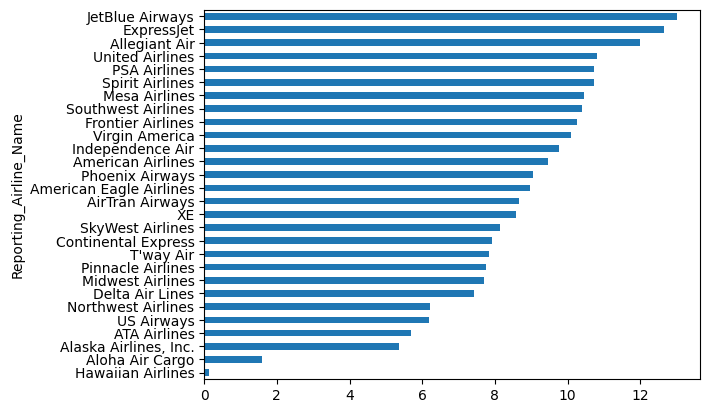

In [44]:
df["Reporting_Airline_Name"] = df["Reporting_Airline"].replace(airline_code_dictory)
df.groupby(["Reporting_Airline_Name"])["DepDelay"].mean().sort_values().plot(kind="barh", y="Reporting_Airline_Name")

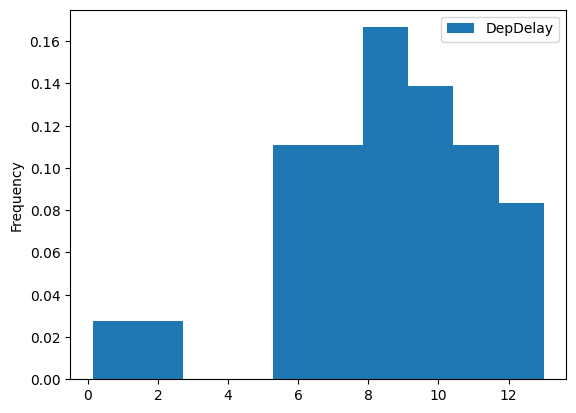

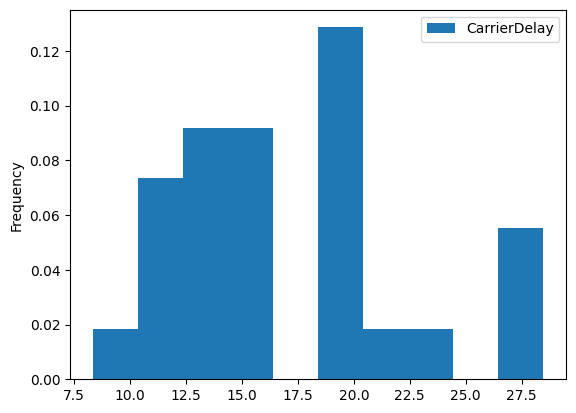

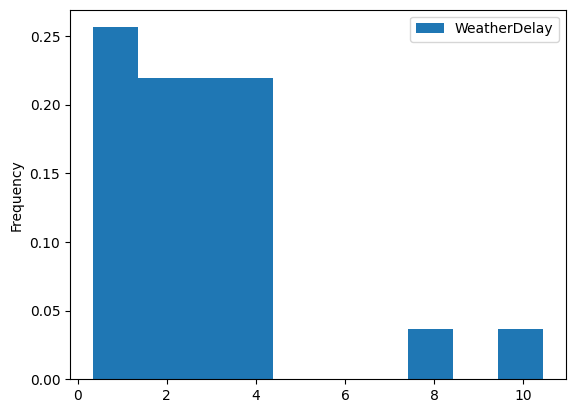

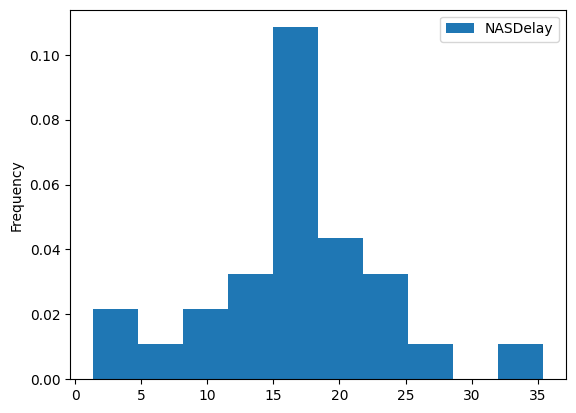

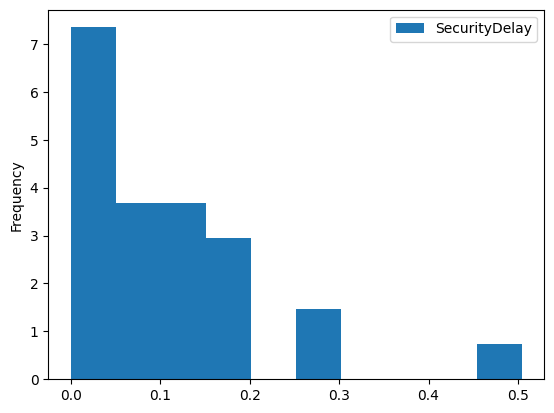

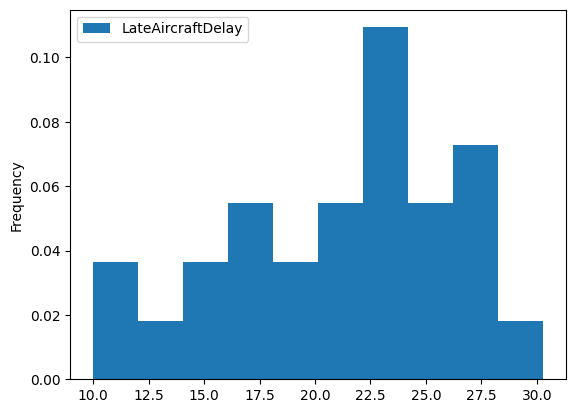

In [47]:
delays = ["DepDelay", 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']
delay_df = df.groupby(["Reporting_Airline_Name"])[delays].mean().sort_values(by="DepDelay").reset_index()

for delay in delays:
    delay_df.plot(kind="hist", y=delay, x="Reporting_Airline_Name", density=True)



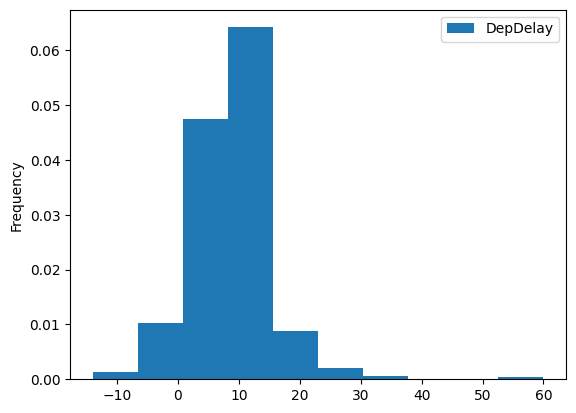

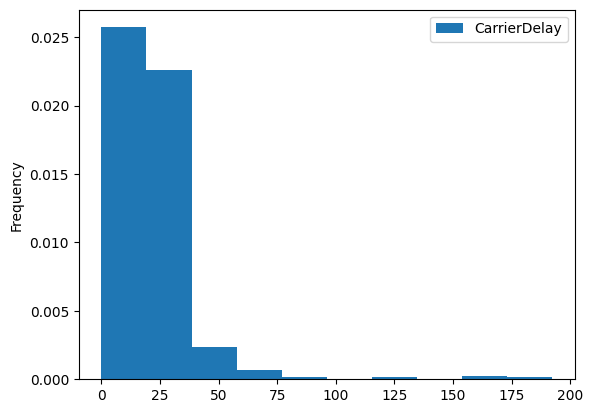

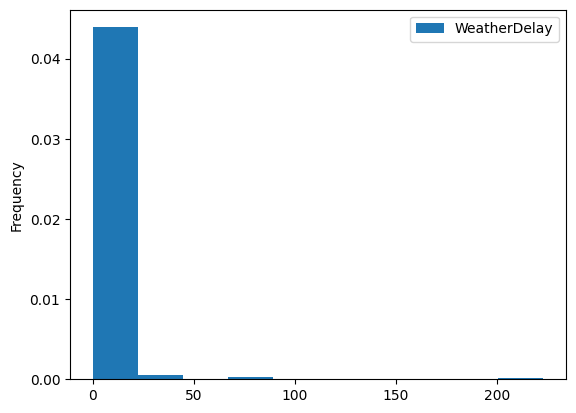

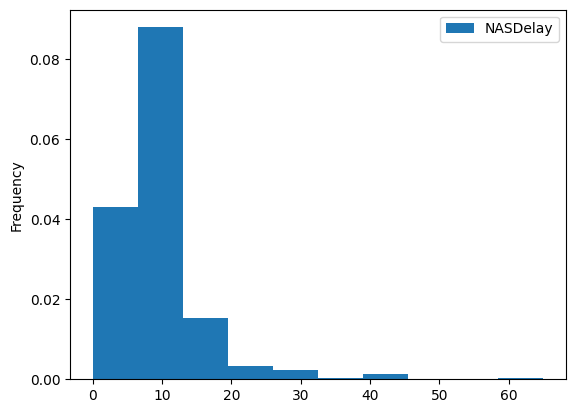

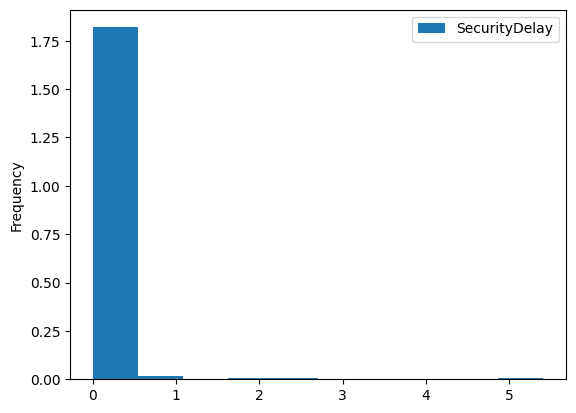

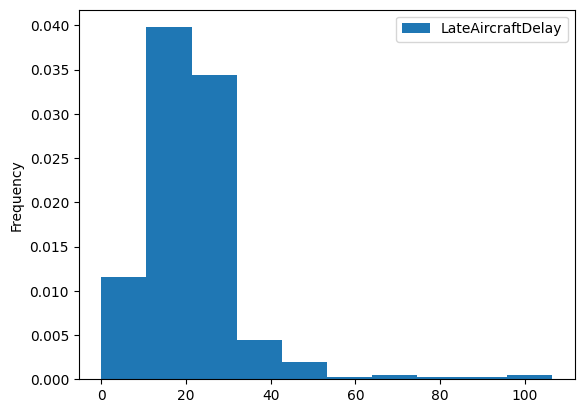

In [48]:
delays = ["DepDelay", 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']
delay_df = df.groupby(["Dest"])[delays].mean().sort_values(by="DepDelay").reset_index()

for delay in delays:
    delay_df.plot(kind="hist", y=delay, x="Dest", density=True)



<Axes: ylabel='Origin'>

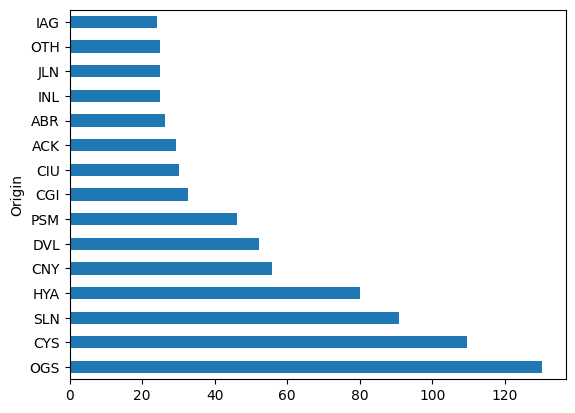

In [49]:
df.groupby(["Origin"])["DepDelay"].mean().sort_values(ascending=False)[:15].plot(kind="barh")

In [50]:
# looking at departure delay groups

grouped_df = df.groupby('DepartureDelayGroups')
grouped_df.count()

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Reporting_Airline_Name
DepartureDelayGroups,,,,,,,,,,,,,,,,,,,,,,,,,,
-2.0,3682,3682,3682,3682,3682,3682,3682,3682,3682,3681,3681,3674,3675,3675,3671,3671,3682,3682,3671,3671,35,35,35,35,35,3682
-1.0,688443,688443,688443,688443,688443,688443,688443,688443,688443,688339,688334,687811,687832,687832,687161,687161,688443,688443,687176,687176,22160,22160,22160,22160,22160,688443
0.0,384083,384083,384083,384083,384083,384083,384083,384083,384083,384014,384010,383539,383558,383558,383175,383175,384083,384083,383186,383185,33373,33373,33373,33373,33373,384083
1.0,91057,91057,91057,91057,91057,91057,91057,91057,91057,91030,91027,90868,90873,90873,90727,90727,91057,91057,90727,90727,42831,42831,42831,42831,42831,91057
2.0,45741,45741,45741,45741,45741,45741,45741,45741,45741,45721,45720,45597,45602,45602,45524,45524,45741,45741,45524,45524,36038,36038,36038,36038,36038,45741
3.0,27835,27835,27835,27835,27835,27835,27835,27835,27835,27821,27820,27743,27747,27747,27687,27687,27835,27835,27687,27687,23733,23733,23733,23733,23733,27835
4.0,18721,18721,18721,18721,18721,18721,18721,18721,18721,18702,18702,18651,18655,18655,18623,18623,18721,18721,18623,18623,16123,16123,16123,16123,16123,18721
5.0,13110,13110,13110,13110,13110,13110,13110,13110,13110,13101,13101,13063,13070,13070,13038,13038,13110,13110,13038,13038,11362,11362,11362,11362,11362,13110
6.0,9629,9629,9629,9629,9629,9629,9629,9629,9629,9617,9617,9579,9580,9580,9555,9555,9629,9629,9555,9555,8334,8334,8334,8334,8334,9629


<Axes: xlabel='DepartureDelayGroups'>

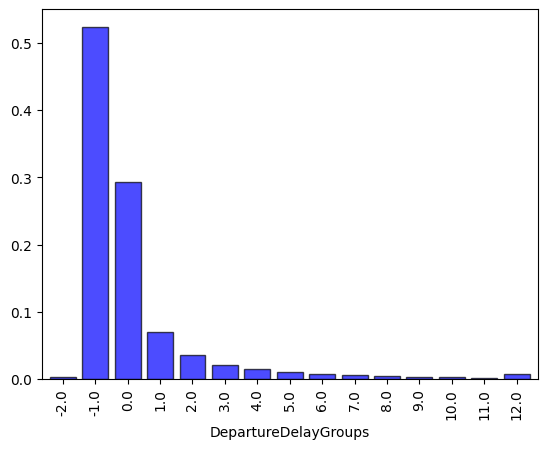

In [51]:
# plotting histogram of departure delay groups

grouped_freq = grouped_df.size()
density = grouped_freq / grouped_freq.sum()
density.plot(kind='bar', width=0.8, alpha=0.7, color='blue', edgecolor='black')

In [52]:
# looking at only significant delays - the entries with a departure delay of >= 30 minutes

significant_delays = df[df['DepartureDelayGroups'] >= 3]

In [53]:
significant_delays

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Reporting_Airline_Name
1,3,2000-05-10,DL,JFK,New York,ATL,Georgia,2010.0,160.0,10.0,101.0,2151.0,2334.0,8.0,2342.0,222.0,12.0,0.0,0.0,212.0,103.0,NaN,NaN,NaN,NaN,NaN,Delta Air Lines
12,5,2000-12-22,DL,ONT,California,SLC,Utah,2110.0,175.0,11.0,18.0,2128.0,2348.0,1.0,2349.0,170.0,11.0,0.0,0.0,99.0,80.0,NaN,NaN,NaN,NaN,NaN,Delta Air Lines
14,5,2000-01-07,AA,EWR,New Jersey,EGE,Colorado,1800.0,50.0,3.0,15.0,1815.0,2033.0,6.0,2039.0,36.0,2.0,0.0,0.0,279.0,258.0,NaN,NaN,NaN,NaN,NaN,American Airlines
17,4,2000-01-20,NW,DTW,Michigan,LAS,Nevada,1020.0,55.0,3.0,39.0,1059.0,1211.0,6.0,1217.0,77.0,5.0,0.0,0.0,297.0,252.0,NaN,NaN,NaN,NaN,NaN,Northwest Airlines
23,2,2000-07-25,US,MDW,Illinois,BWI,Maryland,1927.0,87.0,5.0,11.0,1938.0,2202.0,3.0,2205.0,79.0,5.0,0.0,0.0,98.0,84.0,NaN,NaN,NaN,NaN,NaN,US Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338872,3,2020-02-26,OH,CLT,North Carolina,RIC,Virginia,1714.0,56.0,3.0,25.0,1739.0,1822.0,11.0,1833.0,63.0,4.0,0.0,0.0,79.0,43.0,11.0,0.0,7.0,0.0,45.0,PSA Airlines
1338887,6,2020-01-04,WN,LAS,Nevada,BNA,Tennessee,1750.0,85.0,5.0,14.0,1804.0,2259.0,5.0,2304.0,69.0,4.0,0.0,0.0,194.0,175.0,0.0,0.0,3.0,0.0,66.0,Southwest Airlines
1338909,7,2020-03-01,WN,MSY,Louisiana,TPA,Florida,2247.0,57.0,3.0,11.0,2258.0,59.0,4.0,103.0,48.0,3.0,0.0,0.0,76.0,61.0,0.0,0.0,0.0,0.0,48.0,Southwest Airlines
1338920,4,2020-02-06,DL,IND,Indiana,ATL,Georgia,1302.0,117.0,7.0,27.0,1329.0,1500.0,6.0,1506.0,141.0,9.0,0.0,0.0,124.0,91.0,0.0,0.0,24.0,0.0,117.0,Delta Air Lines


<Axes: ylabel='Reporting_Airline'>

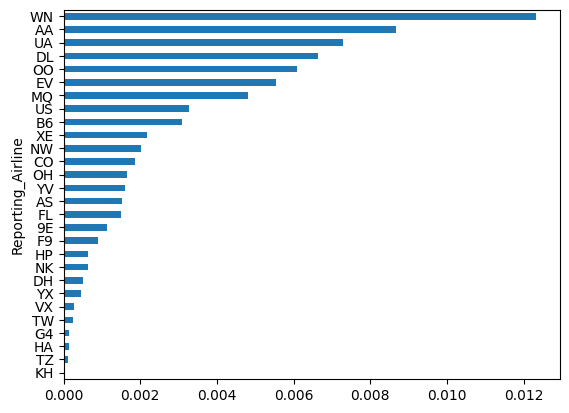

In [54]:
# plotting bar chart of percentage of delays recorded in each airline

(significant_delays.groupby("Reporting_Airline").count()['Dest'] / df.groupby("Reporting_Airline").count()['Dest'].sum()).sort_values().plot(kind="barh")

<Axes: ylabel='Origin'>

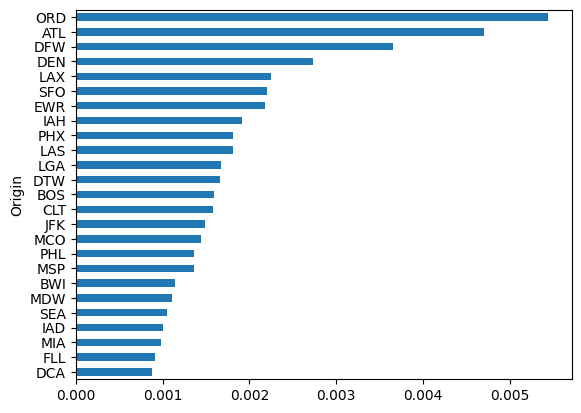

In [55]:
# plotting bar chart of percentage of delays recorded for the top 25 airports

(significant_delays.groupby("Origin").count()['Dest'] / df.groupby("Origin").count()['Dest'].sum()).sort_values().tail(25).plot(kind="barh")

## Hypothesis Testing and Analysis

In [56]:
# setting up data to conduct a hypothesis with busier vs less busier airports

df.dropna(subset = ['DepDelay'], inplace=True)

airport_counts = df.groupby('Origin').count().sort_values(by = 'Dest')
airport_counts = airport_counts.reset_index().iloc[:, :2]
airport_counts.columns = ['Origin', 'Counts']

less_busy_airports = airport_counts[airport_counts['Counts'] < airport_counts['Counts'].median()]['Origin'].to_list()
less_busy = df[df['Origin'].isin(less_busy_airports)]
more_busy_airports = airport_counts[airport_counts['Counts'] > airport_counts['Counts'].median()]['Origin'].to_list()
more_busy = df[df['Origin'].isin(more_busy_airports)]

Null hypothesis: There is no significant difference in the mean departure delay values between the busiest airports vs the less busier airports

Alternate hypothesis: The mean departure delay of the less busy airports is less than that of the busier airports

In [57]:
top_delays = more_busy['DepDelay']
bottom_delays = less_busy['DepDelay']

t_statistic, p_value = ttest_ind(bottom_delays, top_delays, alternative='less')
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -8.771371369269811
P-value: 8.835366407516053e-19


In [58]:
[top_delays.mean(), bottom_delays.mean()]

[9.095169419268782, 6.931420507996237]

In [59]:
airline_counts = df.groupby('Reporting_Airline').count().sort_values(by = 'Dest')
airline_counts = airline_counts.reset_index().iloc[:, :2]
airline_counts.columns = ['Airline', 'Counts']

less_busy_airlines = airline_counts[airline_counts['Counts'] < airline_counts['Counts'].median()]['Airline'].to_list()
less_busy = df[df['Reporting_Airline'].isin(less_busy_airlines)]
more_busy_airlines = airline_counts[airline_counts['Counts'] > airline_counts['Counts'].median()]['Airline'].to_list()
more_busy = df[df['Reporting_Airline'].isin(more_busy_airlines)]

Null hypothesis: There is no significant difference in the mean departure delay values between the busiest airlines vs the less busier airlines

Alternate hypothesis: The mean departure delay of the less busy airlines is less than that of the busier airlines

In [60]:
top_delays = more_busy['DepDelay']
bottom_delays = less_busy['DepDelay']

t_statistic, p_value = ttest_ind(bottom_delays, top_delays, alternative='less')
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -3.7289848394242275
P-value: 9.613039286074075e-05


In [61]:
[top_delays.mean(), bottom_delays.mean()]

[9.100357714040191, 8.725047964186741]

## ADD REMAINING HYPOTHESIS TESTS HERE

In [62]:
def run_permutation(df, category="category", operation=lambda x, y: 0, n=1000):
    random_df = df.copy(deep=True)
    sample_stat = operation(df, category)
    sim_stats = []
    for _ in range(1000):
        random_df["simulated"] = random_df[category].sample(frac=1).reset_index(drop=True)
        random_df
        sim_stats.append(
            operation(random_df.drop(category, axis=1), "simulated")
        )
    return np.array(sim_stats), sample_stat

diff_means = lambda df, category: df.groupby(category).mean().diff().iloc[1, 0]

## ICC Hypothesis Testing

In [63]:
import re
# https://www.icao.int/sustainability/Documents/LCC-List.pdf
f = open("list_of_LCCs.txt", "r")
LCC_data = f.read()
f.close()

ICAO = re.findall(r" ([A-Z\d][A-Z\d][A-Z\d]) ", LCC_data)
LATA = re.findall(r" ([A-Z\d][A-Z\d]) ", LCC_data)
df["Is_LCC"] = df["Reporting_Airline"].isin(LATA)
df

,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Reporting_Airline_Name,Is_LCC
1,3,2000-05-10,DL,JFK,New York,ATL,Georgia,2010.0,160.0,10.0,101.0,2151.0,2334.0,8.0,2342.0,222.0,12.0,0.0,0.0,212.0,103.0,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,False
2,2,2000-05-30,HP,LAS,Nevada,LAX,California,1948.0,2.0,0.0,20.0,2008.0,2052.0,12.0,2104.0,9.0,0.0,0.0,0.0,76.0,44.0,NaN,NaN,NaN,NaN,NaN,Phoenix Airways,False
3,5,2000-03-03,DL,LAS,Nevada,LAX,California,602.0,2.0,0.0,11.0,613.0,658.0,11.0,709.0,7.0,0.0,0.0,0.0,67.0,45.0,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,False
4,1,2000-08-07,WN,HOU,Texas,MSY,Louisiana,853.0,8.0,0.0,5.0,858.0,950.0,5.0,955.0,10.0,0.0,0.0,0.0,62.0,52.0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,True
5,6,2000-11-11,US,IAD,Virginia,BOS,Massachusetts,742.0,-3.0,-1.0,12.0,754.0,912.0,12.0,924.0,7.0,0.0,0.0,0.0,102.0,78.0,NaN,NaN,NaN,NaN,NaN,US Airways,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339005,6,2020-01-11,OH,CLT,North Carolina,DSM,Iowa,2212.0,-2.0,-1.0,24.0,2236.0,2334.0,12.0,2346.0,-12.0,-1.0,0.0,0.0,154.0,118.0,NaN,NaN,NaN,NaN,NaN,PSA Airlines,False
1339006,3,2020-01-15,WN,STL,Missouri,MSY,Louisiana,1401.0,16.0,1.0,6.0,1407.0,1535.0,2.0,1537.0,7.0,0.0,0.0,0.0,96.0,88.0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,True
1339007,4,2020-03-05,WN,BWI,Maryland,JAX,Florida,909.0,9.0,0.0,11.0,920.0,1108.0,3.0,1111.0,1.0,0.0,0.0,0.0,122.0,108.0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,True
1339008,1,2020-03-30,OH,CVG,Kentucky,PHL,Pennsylvania,1519.0,-19.0,-2.0,11.0,1530.0,1636.0,7.0,1643.0,-34.0,-2.0,0.0,0.0,84.0,66.0,NaN,NaN,NaN,NaN,NaN,PSA Airlines,False


In [64]:
import scipy.stats as stats
stats.ttest_ind(
    df.loc[df["Is_LCC"], "DepDelay"], 
    df.loc[~df["Is_LCC"], "DepDelay"], 
    equal_var=False,
    alternative='greater'
),

(Ttest_indResult(statistic=12.980451316374722, pvalue=7.947441909555479e-39),)

In [65]:
df.loc[df["Is_LCC"], "DepDelay"].mean(), df.loc[~df["Is_LCC"], "DepDelay"].mean() 

(9.56971785698677, 8.766303062888772)

In [66]:
delay_df = df[df["DepDelay"] > 0]
import scipy.stats as stats
stats.ttest_ind(
    delay_df.loc[delay_df["Is_LCC"], "DepDelay"], 
    delay_df.loc[~delay_df["Is_LCC"], "DepDelay"], 
    equal_var=False,
    alternative='less'
),

(Ttest_indResult(statistic=-35.578395802393395, pvalue=3.4960006138134593e-277),)

In [67]:
delay_df.loc[delay_df["Is_LCC"], "DepDelay"].mean(), delay_df.loc[~delay_df["Is_LCC"], "DepDelay"].mean() 

(28.23119846460051, 33.31429271880363)

In [68]:
diff_means = lambda df, category: df.groupby(category).mean().diff().iloc[1, 0]
sim_stats, sample_stat = run_permutation(delay_df[["Is_LCC", "DepDelay"]], category="Is_LCC", operation=diff_means, n=1000)
np.sum(sim_stats < sample_stat) / len(sim_stats)

0.0

# Network Study

In [69]:
def network_study(df):
    Airports = df["Origin"].value_counts() + df["Dest"].value_counts()
    Airports = Airports.reset_index().T

    Airports.columns = Airports.loc["index"]
    return Airports.drop("index")

airport_dist = df.groupby("Reporting_Airline_Name"
                          ).apply(network_study).reset_index().set_index("Reporting_Airline_Name").drop("level_1", axis=1)



airport_dist = airport_dist.apply(lambda x: x/x.sum(), axis=1)
max_node_cap = airport_dist.max(axis=1).sort_values(ascending=False)
max_node_cap > max_node_cap.median()
df["has_major_hub"] = df["Reporting_Airline_Name"].apply(lambda x: (max_node_cap > max_node_cap.median()).loc[x])

In [70]:
stats.ttest_ind(
    df.loc[df["has_major_hub"], "DepDelay"], 
    df.loc[~df["has_major_hub"], "DepDelay"], 
    equal_var=False,
    alternative='less'
),

(Ttest_indResult(statistic=-16.56628792276362, pvalue=6.254414084456854e-62),)

In [71]:
df.loc[~df["has_major_hub"], "DepDelay"].mean(), df.loc[df["has_major_hub"], "DepDelay"].mean()

(9.4046464956446, 8.294985619607353)

In [72]:
delay_df = df[df["DepDelay"] > 0]

import scipy.stats as stats
stats.ttest_ind(
    delay_df.loc[delay_df["has_major_hub"], "DepDelay"], 
    delay_df.loc[~delay_df["has_major_hub"], "DepDelay"], 
    equal_var=False,
    alternative='less'
),

(Ttest_indResult(statistic=-0.10364800515558213, pvalue=0.4587243841294354),)

In [73]:
delay_df.loc[~delay_df["has_major_hub"], "DepDelay"].mean(), delay_df.loc[delay_df["has_major_hub"], "DepDelay"].mean()


(31.261724054351603, 31.244893286336765)

# Airline Delay Recovery

In [83]:
delay_df = df[df["DepDelay"] > 0].dropna()
delay_df["Arr - Dep"] = delay_df["ArrDelay"] - delay_df["DepDelay"]
delay_df.groupby("Reporting_Airline")[['ArrDelay', 'DepDelay','Arr - Dep']].mean()

,ArrDelay,DepDelay,Arr - Dep
Reporting_Airline,,,
9E,70.515215,67.840154,2.675061
AA,64.487001,60.644755,3.842246
AS,54.630137,51.550071,3.080066
B6,71.286337,68.425401,2.860936
CO,60.929565,53.736429,7.193136
DH,65.437023,62.569656,2.867366
DL,62.662119,58.793241,3.868878
EV,69.432053,67.905954,1.526099
F9,61.272760,58.710461,2.562299


In [84]:
# max_node_cap = airport_dist.max(axis=1)
# max_node_prop =  max_node_cap / airport_dist.sum(axis=1)
# #max_node_prop = max_node_prop.sort_values(ascending=False)
# df["Prop of Airlines Traffic at Biggest Hub"] = df["Reporting_Airline_Name"].apply(lambda x: (max_node_prop).loc[x])
# df

In [85]:
import scipy.stats as stats

stats.ttest_ind(
    delay_df.loc[delay_df["has_major_hub"], "Arr - Dep"], 
    delay_df.loc[~delay_df["has_major_hub"], "Arr - Dep"], 
    equal_var=False,
    alternative='greater'
),

(Ttest_indResult(statistic=14.989132001242403, pvalue=4.8972761389145644e-51),)

In [86]:
xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(delay_df.loc[delay_df["has_major_hub"], "Arr - Dep"]), 
    sm.stats.DescrStatsW(delay_df.loc[~delay_df["has_major_hub"], "Arr - Dep"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((1.2068671501747494, 1.5699676049129487),)

In [87]:
stats.ttest_ind(
    delay_df.loc[delay_df["Is_LCC"], "Arr - Dep"], 
    delay_df.loc[~delay_df["Is_LCC"], "Arr - Dep"], 
    equal_var=False,
    alternative='less'
),

(Ttest_indResult(statistic=-23.078061043930486, pvalue=5.859447770326755e-118),)

In [88]:
xy_object = sm.stats.CompareMeans(
    sm.stats.DescrStatsW(delay_df.loc[delay_df["Is_LCC"], "Arr - Dep"]), 
    sm.stats.DescrStatsW(delay_df.loc[~delay_df["Is_LCC"], "Arr - Dep"])
)

sm_result = xy_object.tconfint_diff(alpha=0.05, usevar='unequal'), 
sm_result

((-2.0746694314045766, -1.7498591272464883),)

In [92]:
type = "Origin"
airport_counts = df.groupby(type).count()
airport_counts = airport_counts.reset_index().iloc[:, :2]
airport_counts.columns = [type, 'Counts']
airport_counts["busy"] = airport_counts["Counts"] > airport_counts["Counts"].median()
airport_counts = airport_counts.set_index(type)
delay_df["is_busy"] = delay_df[type].apply(lambda x: airport_counts.loc[x, "busy"])
stats.ttest_ind(
    delay_df.loc[delay_df["is_busy"], "Arr - Dep"], 
    delay_df.loc[~delay_df["is_busy"], "Arr - Dep"], 
    equal_var=False,
    alternative='greater'
),

(Ttest_indResult(statistic=-0.5281452214840481, pvalue=0.7012816326862625),)

In [93]:
type = "Dest"
airport_counts = df.groupby(type).count()
airport_counts = airport_counts.reset_index().iloc[:, :2]
airport_counts.columns = [type, 'Counts']
airport_counts["busy"] = airport_counts["Counts"] > airport_counts["Counts"].median()
airport_counts = airport_counts.set_index(type)
delay_df["is_busy"] = delay_df[type].apply(lambda x: airport_counts.loc[x, "busy"])
stats.ttest_ind(
    delay_df.loc[delay_df["is_busy"], "Arr - Dep"], 
    delay_df.loc[~delay_df["is_busy"], "Arr - Dep"], 
    equal_var=False,
    alternative='greater'
),

(Ttest_indResult(statistic=4.0922484082676585, pvalue=2.1826977054604958e-05),)